# Analisando Bases de Dados do ENEM

Foi utilizado o conjunto de dados disponível [aqui](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem), pelo INEP.


## Importando os pacotes a serem utilizados

In [5]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible

In [3]:
import pandas as pd
#from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

## Base de Dados

In [21]:
# Este é o caminho do arquivo no Google Drive
file_path = '/content/MICRODADOS_ENEM_2022.csv'


# Carregar o arquivo CSV em um DataFrame
df_microdados = pd.read_csv(file_path, delimiter=";", encoding='latin1' )
df_microdados.shape

(3476105, 76)

In [12]:
df_microdados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [13]:
df_microdados.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1012883,210054510683,2022,11,F,1,3,1,2,0,2,...,A,A,A,A,A,A,A,A,A,A
1012884,210055641636,2022,1,M,1,1,1,3,0,1,...,A,A,A,B,A,A,B,A,B,B
1012885,210055066266,2022,2,F,1,3,1,2,0,2,...,B,A,B,C,B,A,E,A,A,B
1012886,210057976844,2022,3,M,1,1,1,2,0,2,...,A,A,A,B,A,A,E,A,A,B
1012887,210057006356,2022,5,M,1,1,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_microdados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [22]:
df_microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

<Axes: >

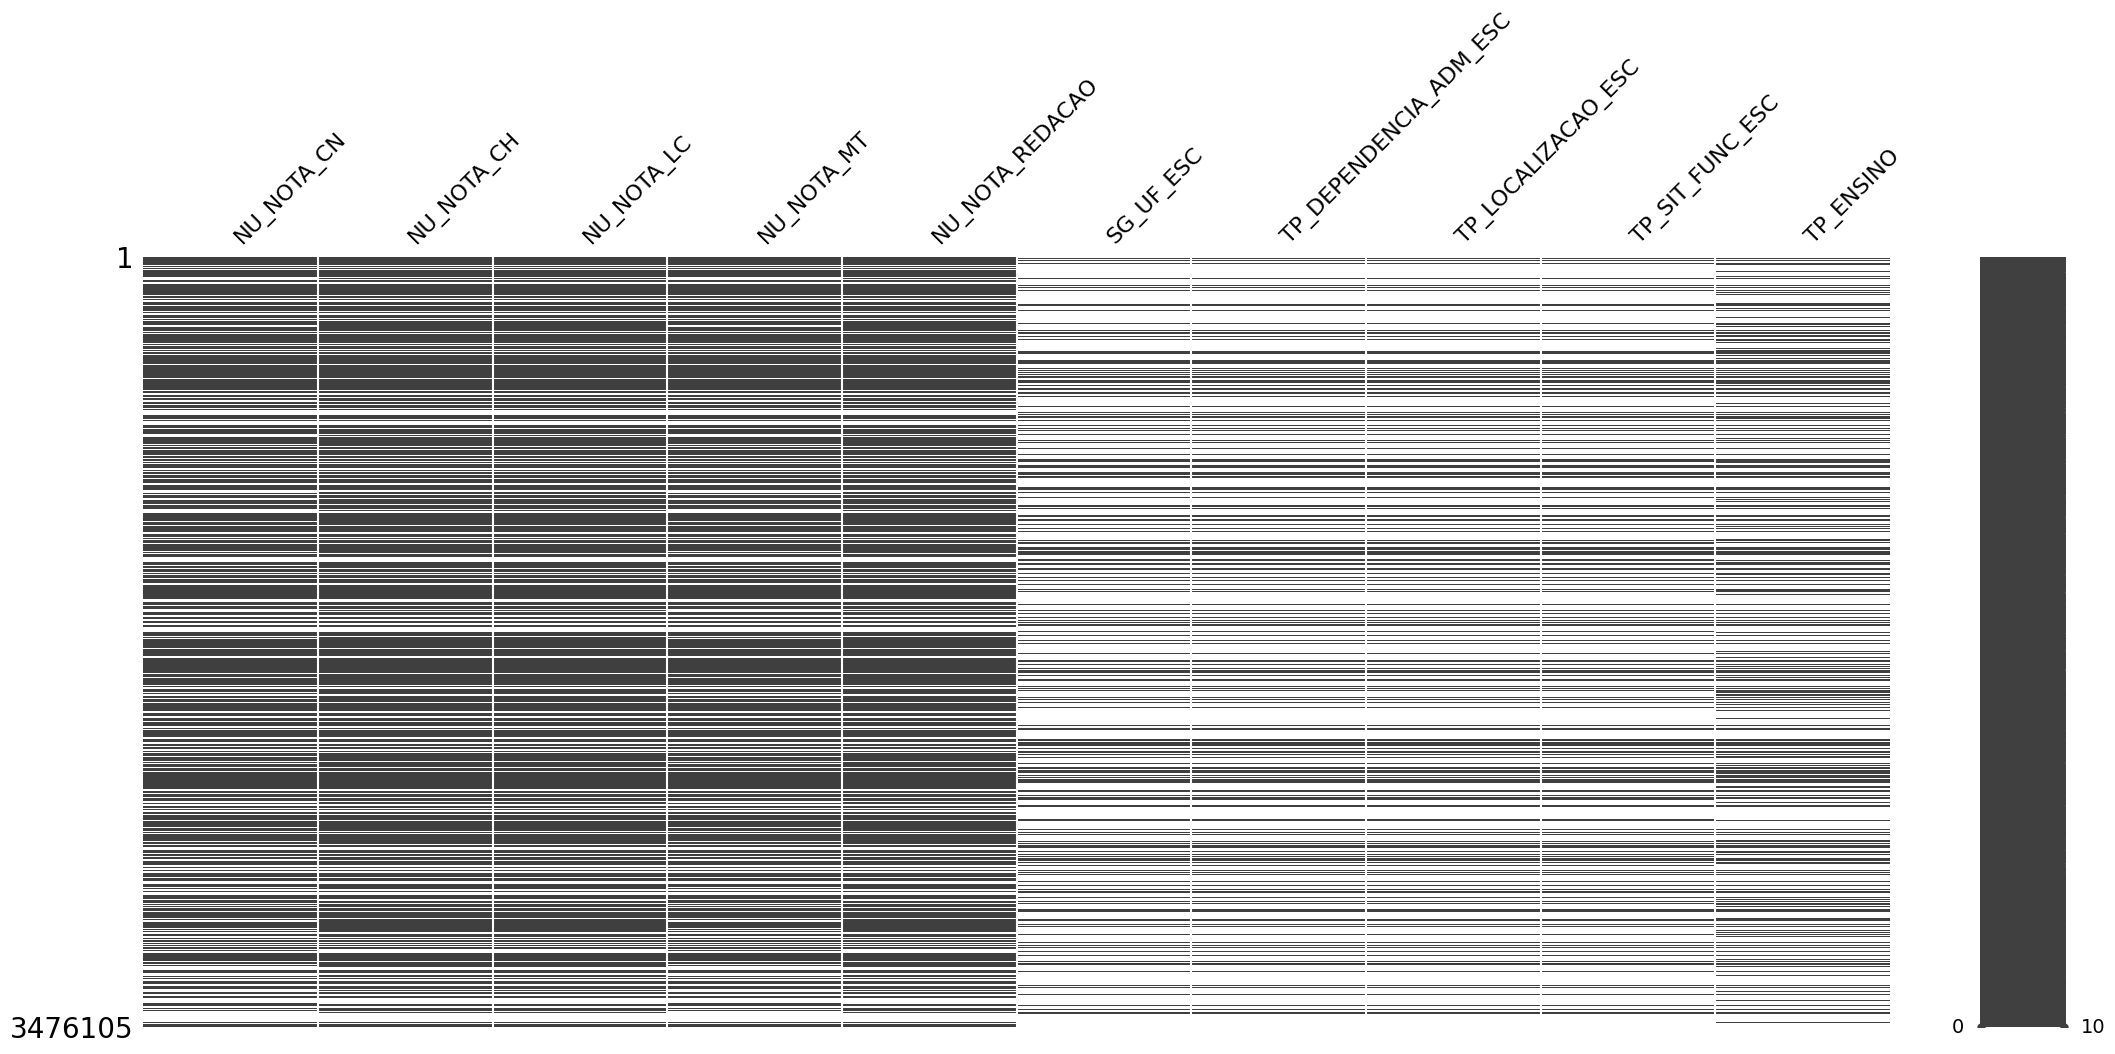

In [23]:
import missingno as msno

msno.matrix(df_microdados[['NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_REDACAO',
'SG_UF_ESC',
'TP_DEPENDENCIA_ADM_ESC',
'TP_LOCALIZACAO_ESC',
'TP_SIT_FUNC_ESC',
'TP_ENSINO']])

In [26]:
df_microdados['TP_PRESENCA_MT'].value_counts()

,count
TP_PRESENCA_MT,
1,2355395
0,1119133
2,1577


## Seleção amostra aleatória

In [27]:
df=df_microdados.sample(n=100000,random_state=123)
df.shape

(100000, 76)

In [28]:
df.to_csv('enem_2022_sample.csv',index=False)

In [4]:
url = "https://raw.githubusercontent.com/accustodio/EDA_ENEM2022/refs/heads/main/enem_2022_sample.csv"
df_teste = pd.read_csv(url)
df_teste.shape

(100000, 76)

## Filtros

In [31]:
df['TP_PRESENCA_MT'].value_counts()/df.shape[0]

,count
TP_PRESENCA_MT,
1,0.67644
0,0.32312
2,0.00044


In [5]:
#Aqui estou limpando os missing data das colunas em que eles representam a ausência do estudante na prova\
 #ou colunas que podem ser interessantes na análise e que os missings não são úteis.

df_filtrado = df_teste.dropna(subset=['NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_REDACAO'
])

df_filtrado.shape

(67351, 76)

In [6]:
#Aqui estou dropando as colunas que não podem não ser úteis na análise, como gabarito, vetores de respostas e notas de competências.

df_filtrado = df_filtrado.drop(['NU_ANO',
'TX_GABARITO_CN',
'TX_GABARITO_CH',
'TX_GABARITO_LC',
'TX_GABARITO_MT',
'TP_LINGUA',
'CO_UF_ESC',
'CO_MUNICIPIO_ESC',
'TP_PRESENCA_CN',
'TP_PRESENCA_CH',
'TP_PRESENCA_LC',
'TP_PRESENCA_MT',
'NO_MUNICIPIO_ESC',
'TX_RESPOSTAS_CN',
'TX_RESPOSTAS_CH',
'TX_RESPOSTAS_LC',
'TX_RESPOSTAS_MT',
'CO_PROVA_CN',
'CO_PROVA_CH',
'CO_PROVA_LC',
'CO_PROVA_MT',
'NU_NOTA_COMP1',
'NU_NOTA_COMP2',
'NU_NOTA_COMP3',
'NU_NOTA_COMP4',
'NU_NOTA_COMP5'
], axis=1)

In [35]:
#Filtro apenas as informações da disciplina MT
df_mt=df[~df['NU_NOTA_MT'].isna()]
print(df_mt.shape)

(67644, 76)


## Análise Descritiva

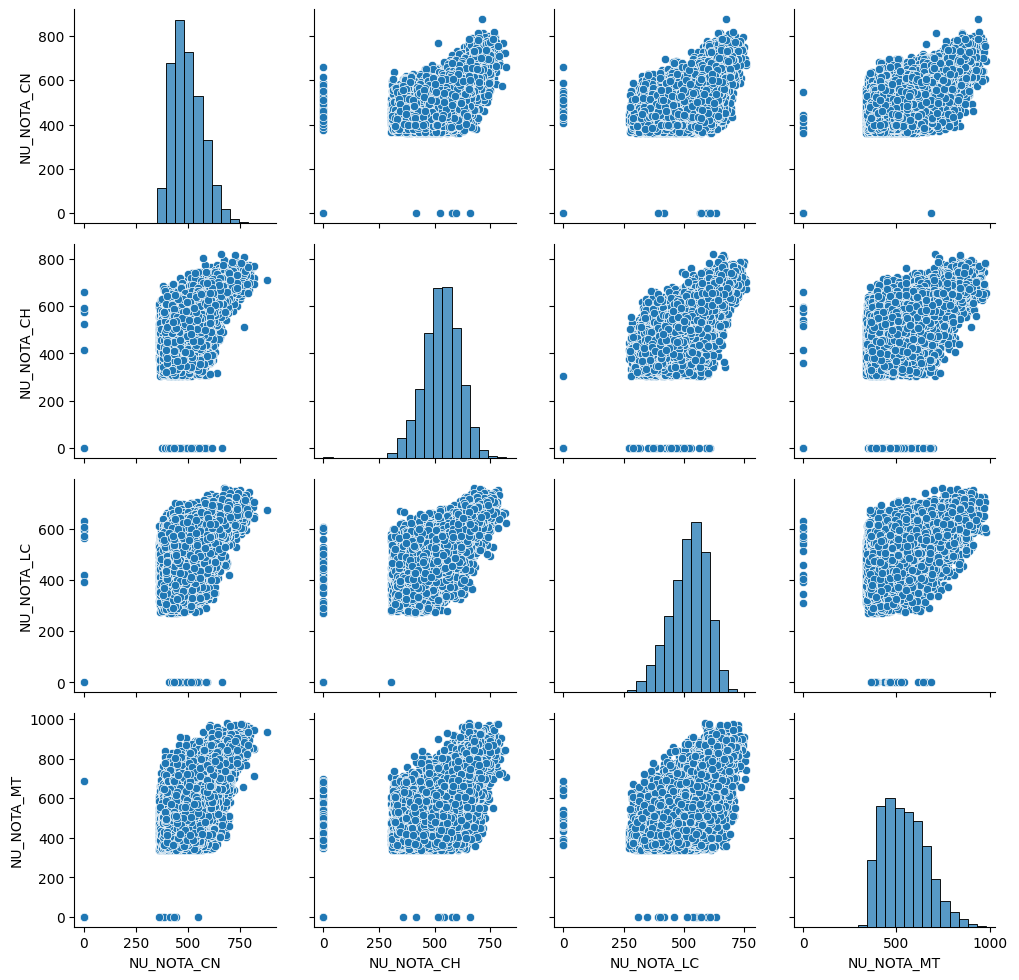

In [36]:
g = sns.PairGrid(df_filtrado[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']])
g.map_diag(sns.histplot, bins=20)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Média

In [37]:
df_filtrado['NU_NOTA_MT'].mean()

np.float64(543.4495657080073)

### Mediana

In [38]:
df_filtrado['NU_NOTA_MT'].median()

532.1

### Qual a Faixa de Idade mais frequente? - Moda

In [49]:
df_filtrado['TP_FAIXA_ETARIA'].mode()

,TP_FAIXA_ETARIA
0,18 anos


In [50]:
df_filtrado['TP_FAIXA_ETARIA'].value_counts()

,count
TP_FAIXA_ETARIA,
18 anos,17078
17 anos,16468
19 anos,7763
Menor de 17 anos,6987
20 anos,4375
21 anos,2757
Entre 26 e 30 anos,2580
22 anos,1961
23 anos,1476


### Correlação

<Axes: >

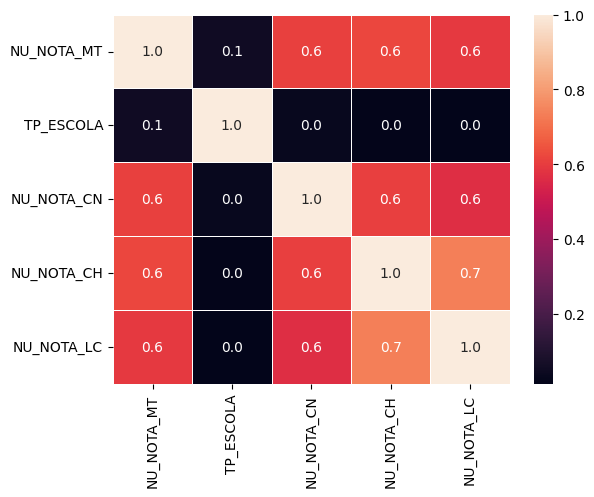

In [41]:
# análise de correlação
correlation = df_filtrado[['NU_NOTA_MT','TP_ESCOLA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']].corr()

# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

## Ajuste de vars

In [7]:
faixa_etaria = {1 : 'Menor de 17 anos',
2 : '17 anos',
3 : '18 anos',
4 : '19 anos',
5 : '20 anos',
6 : '21 anos',
7 : '22 anos',
8 : '23 anos',
9 : '24 anos',
10 : '25 anos',
11 : 'Entre 26 e 30 anos',
12 : 'Entre 31 e 35 anos',
13 : 'Entre 36 e 40 anos',
14 : 'Entre 41 e 45 anos',
15 : 'Entre 46 e 50 anos',
16 : 'Entre 51 e 55 anos',
17 : 'Entre 56 e 60 anos',
18 : 'Entre 61 e 65 anos',
19 : 'Entre 66 e 70 anos',
20 : 'Maior de 70 anos'}

faixa_renda = {'A':'Nenhuma Renda',
'B' :'Até R$ 1.212,00',
'C':'De R$ 1.212,01 até R$ 1.818,00',
'D':'De R$ 1.818,01 até R$ 2.424,00',
'E':'De R$ 2.424,01 até R$ 3.030,00',
'F':'De R$ 3.030,01 até R$ 3.636,00',
'G':'De R$ 3.636,01 até R$ 4.848,00',
'H':'De R$ 4.848,01 até R$ 6.060,00',
'I':'De R$ 6.060,01 até R$ 7.272,00',
'J':'De R$ 7.272,01 até R$ 8.484,00',
'K':'De R$ 8.484,01 até R$ 9.696,00',
'L':'De R$ 9.696,01 até R$ 10.908,00',
'M':'De R$ 10.908,01 até R$ 12.120,00',
'N':'De R$ 12.120,01 até R$ 14.544,00',
'O':'De R$ 14.544,01 até R$ 18.180,00',
'P':'De R$ 18.180,01 até R$ 24.240,00',
'Q':'Acima de R$ 24.240,00'}

faixa_escolaridade = {'A': 'Nunca estudou.',
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
'G': 'Completou a Pós-graduação.',
'H': 'Não sei.'}

raca = {0:'Não declarado',
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indígena'}

escola = { 1:'Não Respondeu',
2:'Pública',
3:'Privada'
}


df_filtrado['TP_FAIXA_ETARIA'] = df_filtrado['TP_FAIXA_ETARIA'].apply(lambda x : faixa_etaria[x])
df_filtrado['TP_COR_RACA'] = df_filtrado['TP_COR_RACA'].apply(lambda x : raca[x])
df_filtrado['Q006'] = df_filtrado['Q006'].apply(lambda x : faixa_renda[x])
df_filtrado['Q002'] = df_filtrado['Q002'].apply(lambda x : faixa_escolaridade[x])
df_filtrado['Q001'] = df_filtrado['Q001'].apply(lambda x : faixa_escolaridade[x])
df_filtrado['TP_ESCOLA'] = df_filtrado['TP_ESCOLA'].apply(lambda x : escola[x])

df_filtrado.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210056821130,17 anos,F,1,Branca,1,3,0,Não Respondeu,NaN,...,A,A,A,B,A,A,B,A,A,B
1,210055361687,17 anos,F,1,Branca,1,2,0,Pública,2.0,...,A,A,A,B,A,A,E,A,A,B
2,210056292313,18 anos,F,1,Parda,1,2,0,Pública,1.0,...,B,A,A,C,B,A,E,A,C,B
4,210054788535,22 anos,F,1,Indígena,2,1,0,Não Respondeu,NaN,...,A,A,A,B,A,A,B,A,A,B
5,210055895094,17 anos,F,1,Branca,2,2,0,Privada,1.0,...,B,A,B,E,B,B,D,A,A,B


In [52]:
df_filtrado['TP_SEXO'].value_counts()

,count
TP_SEXO,
F,41069
M,26282


### Group by

In [53]:
#Média da proficiencia por Sexo declarado
df_filtrado.groupby('TP_SEXO')['NU_NOTA_MT'].agg(['count','mean'])

,count,mean
TP_SEXO,,
F,41069,526.812270
M,26282,569.447477


In [57]:
#Media da proficiencia por faixa etaria
df_filtrado.groupby('TP_FAIXA_ETARIA')['NU_NOTA_MT'].agg(['count','mean','median','var'])

,count,mean,median,var
TP_FAIXA_ETARIA,,,,
17 anos,16468,549.717130,542.10,12816.194996
18 anos,17078,541.221583,530.50,13023.661341
19 anos,7763,539.359887,523.40,14417.408272
20 anos,4375,545.291840,527.60,15529.913214
21 anos,2757,548.593834,531.10,15648.517125
22 anos,1961,549.953493,530.90,16140.079642
23 anos,1476,539.545935,518.95,15456.241075
24 anos,1047,540.752245,525.40,14994.724027
25 anos,880,535.025682,518.70,13483.040614


In [59]:
#Media da proficiencia por raça e genero
df_filtrado.groupby(['TP_COR_RACA','TP_SEXO'])['NU_NOTA_MT'].agg(['count','mean','median','std'])

count        mean  median         std
TP_COR_RACA   TP_SEXO                                       
Amarela       F          833  524.994238  504.20  117.527806
              M          442  587.111765  583.70  129.409259
Branca        F        17893  557.982697  553.00  115.129092
              M        11779  601.236251  602.20  123.363408
Indígena      F          188  457.930319  442.05   80.509485
              M          144  500.950000  483.20  103.520614
Não declarado F          691  521.314616  502.80  114.073842
              M          500  561.252800  555.10  128.561838
Parda         F        17096  503.292068  486.50   98.574604
              M        10583  545.577407  537.00  114.061277
Preta         F         4368  495.363553  482.35   93.549089
              M         2834  528.632498  518.60  104.778278

### Describe Variáveis numéricas

In [63]:
df_filtrado.describe()

,NU_INSCRICAO,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005
count,6.735100e+04,67351.000000,67351.000000,67351.000000,67351.000000,26854.000000,67351.000000,19835.000000,19835.000000,19835.000000,6.735100e+04,67351.000000,67351.000000,67351.000000,67351.000000,67351.000000,67351.000000,67351.000000,67351.000000
mean,2.100563e+11,1.027037,1.028507,1.768081,1.747309,1.004915,0.176434,2.558104,1.030754,1.016436,3.111420e+06,30.965984,496.292676,530.166820,519.968920,543.449566,1.152871,629.397930,3.765438
std,1.015968e+06,0.341179,0.212010,0.740948,3.619026,0.069939,0.381192,0.994281,0.172654,0.206607,9.844512e+05,9.815685,71.921109,79.985988,76.372823,116.434202,0.795664,204.466223,1.302036
min,2.100545e+11,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.100015e+06,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.100554e+11,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.408102e+06,24.000000,440.600000,480.700000,471.900000,449.000000,1.000000,540.000000,3.000000
50%,2.100563e+11,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,3.127107e+06,31.000000,486.200000,532.900000,528.000000,532.100000,1.000000,640.000000,4.000000
75%,2.100571e+11,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,4.000000,1.000000,1.000000,3.550308e+06,35.000000,543.400000,584.200000,575.200000,623.800000,1.000000,780.000000,4.000000
max,2.100580e+11,4.000000,4.000000,4.000000,16.000000,2.000000,1.000000,4.000000,2.000000,4.000000,5.300108e+06,53.000000,875.300000,822.200000,757.600000,981.700000,9.000000,1000.000000,20.000000


### Describe variáveis categóricas

In [64]:
df_filtrado.describe(include=object)

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,Q001,Q002,Q003,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,67351,67351,67351,67351,19835,67351,67351,67351,67351,67351,...,67351,67351,67351,67351,67351,67351,67351,67351,67351,67351
unique,20,2,6,3,27,1701,27,8,8,6,...,5,5,2,5,2,2,5,2,5,2
top,18 anos,F,Branca,Não Respondeu,SP,São Paulo,SP,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",C,...,B,A,A,B,A,A,D,A,A,B
freq,17078,41069,29672,39992,4081,2973,10798,20804,24558,15352,...,35483,64792,48666,41824,54866,50519,21835,57948,28293,62015


### Skimpy

https://pypi.org/project/skimpy/

In [65]:
skim(df_filtrado)

KeyError: np.int64(0)

## Criação da Nota média

In [67]:
df_filtrado['NOTA_FINAL'] = (df_filtrado['NU_NOTA_LC'] + df_filtrado['NU_NOTA_MT'] + df_filtrado['NU_NOTA_CH'] +df_filtrado['NU_NOTA_CN'] + df_filtrado['NU_NOTA_REDACAO']) / 5

df_filtrado['NOTA_FINAL'].describe()

,NOTA_FINAL
count,67351.000000
mean,543.855182
std,88.351097
min,150.660000
25%,485.000000
50%,541.020000
75%,602.540000
max,841.980000


## Visualização dos Dados

<Axes: ylabel='Frequency'>

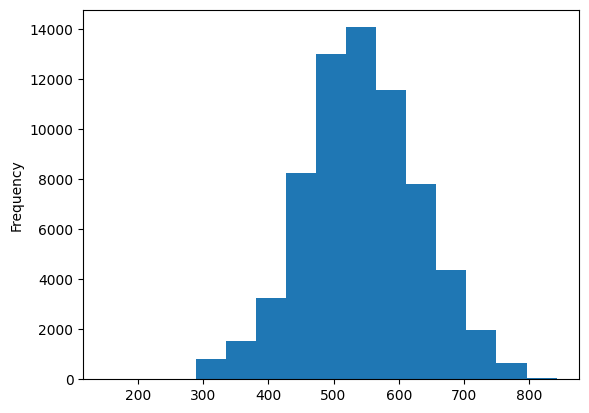

In [68]:
#Histograma com a distribuição da nota final média
df_filtrado['NOTA_FINAL'].plot.hist(bins=15)

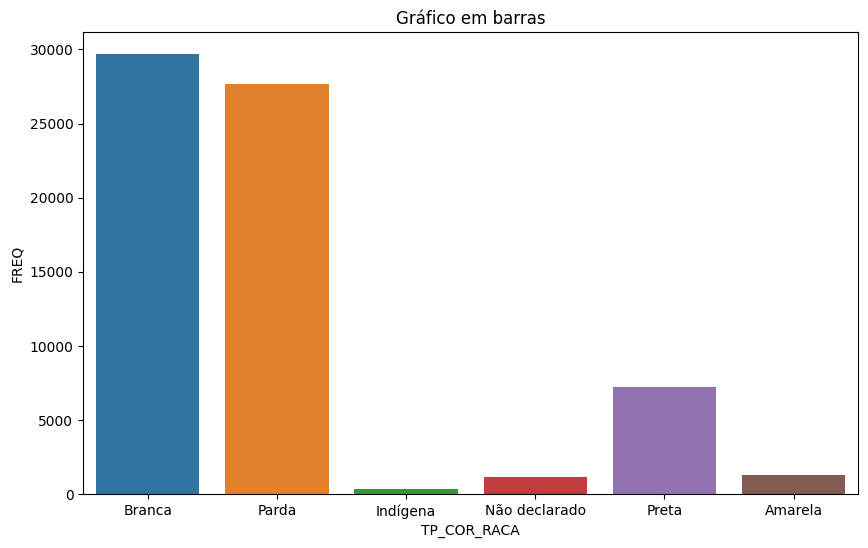

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TP_COR_RACA', data=df_filtrado, hue='TP_COR_RACA')
plt.title('Gráfico em barras')
plt.xlabel('TP_COR_RACA')
plt.ylabel('FREQ')
plt.show()


<Axes: xlabel='NOTA_FINAL', ylabel='Q002'>

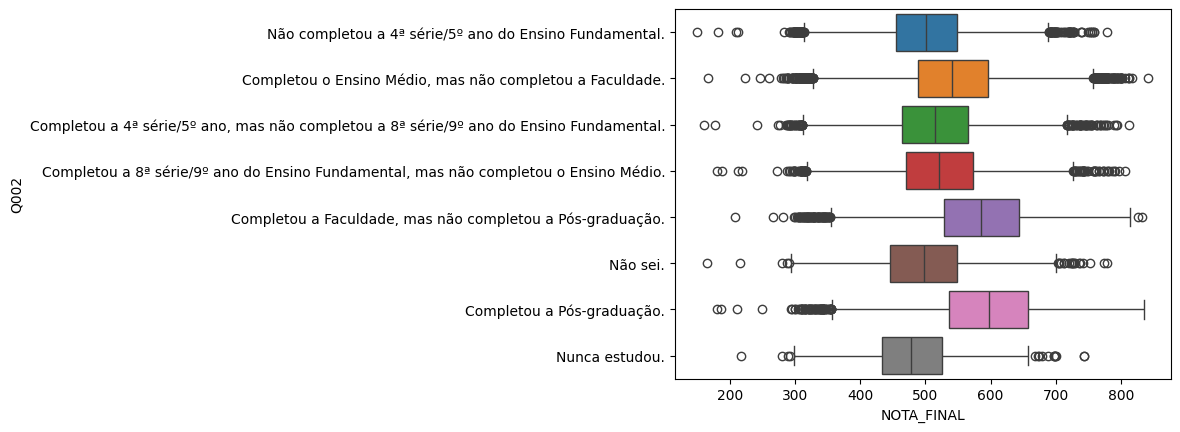

In [71]:
import seaborn as sns

sns.boxplot(data=df_filtrado, x="NOTA_FINAL", y="Q002", hue="Q002")

<Axes: xlabel='NOTA_FINAL', ylabel='Q001'>

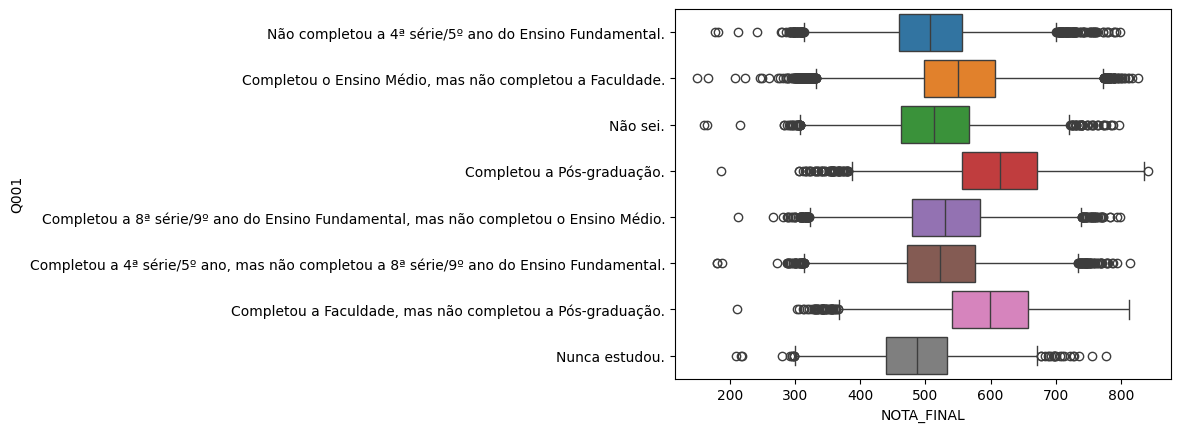

In [73]:
sns.boxplot(data=df_filtrado, x="NOTA_FINAL", y="Q001", hue="Q001")

<Axes: xlabel='NOTA_FINAL', ylabel='TP_COR_RACA'>

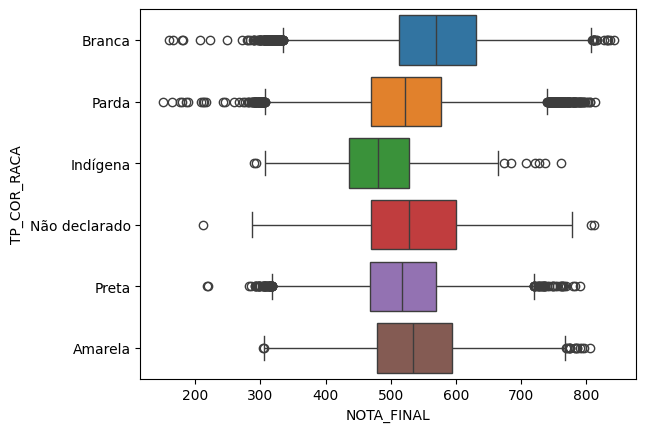

In [77]:
sns.boxplot(data=df_filtrado, x="NOTA_FINAL", y="TP_COR_RACA", hue="TP_COR_RACA")


<Axes: xlabel='NOTA_FINAL', ylabel='TP_COR_RACA'>

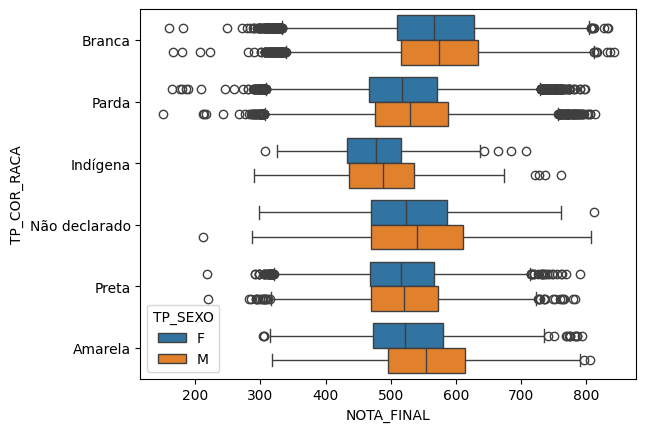

In [78]:
sns.boxplot(data=df_filtrado, x="NOTA_FINAL", y="TP_COR_RACA", hue="TP_SEXO")


In [1]:
plt.figure(figsize=(10,10))

sns.boxplot(x='Q002',y= 'NU_NOTA_MT',hue='TP_ESCOLA', data = df_filtrado)#, orient='h')
plt.ylabel("Nota Matemática")
plt.title("Escolaridade Mãe")

NameError: name 'plt' is not defined

### Plotnine

Documentação [aqui](https://plotnine.org/)


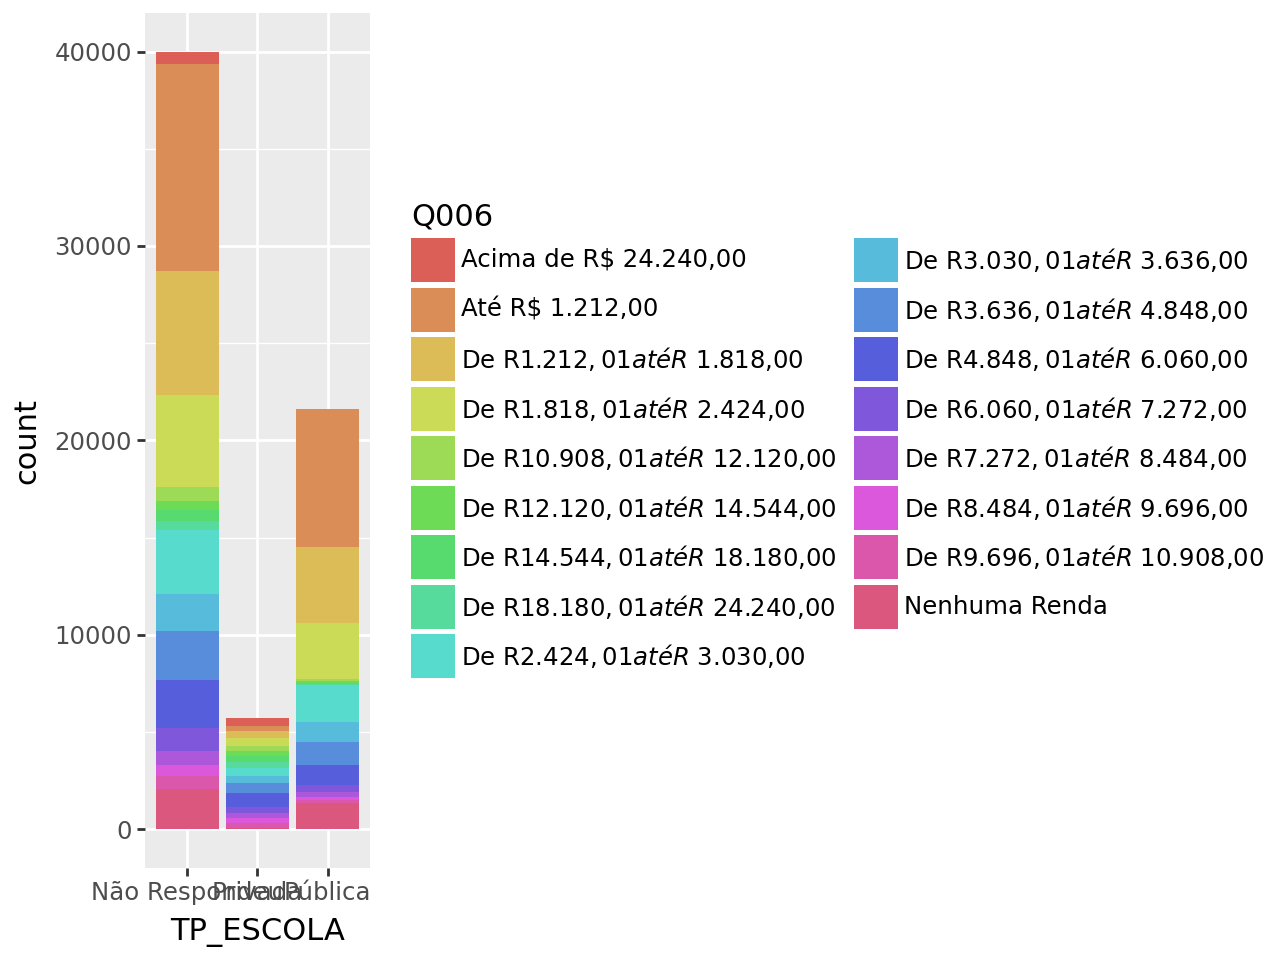

In [89]:
(ggplot(df_filtrado, aes(x='TP_ESCOLA', fill='Q006'))
  + geom_bar())

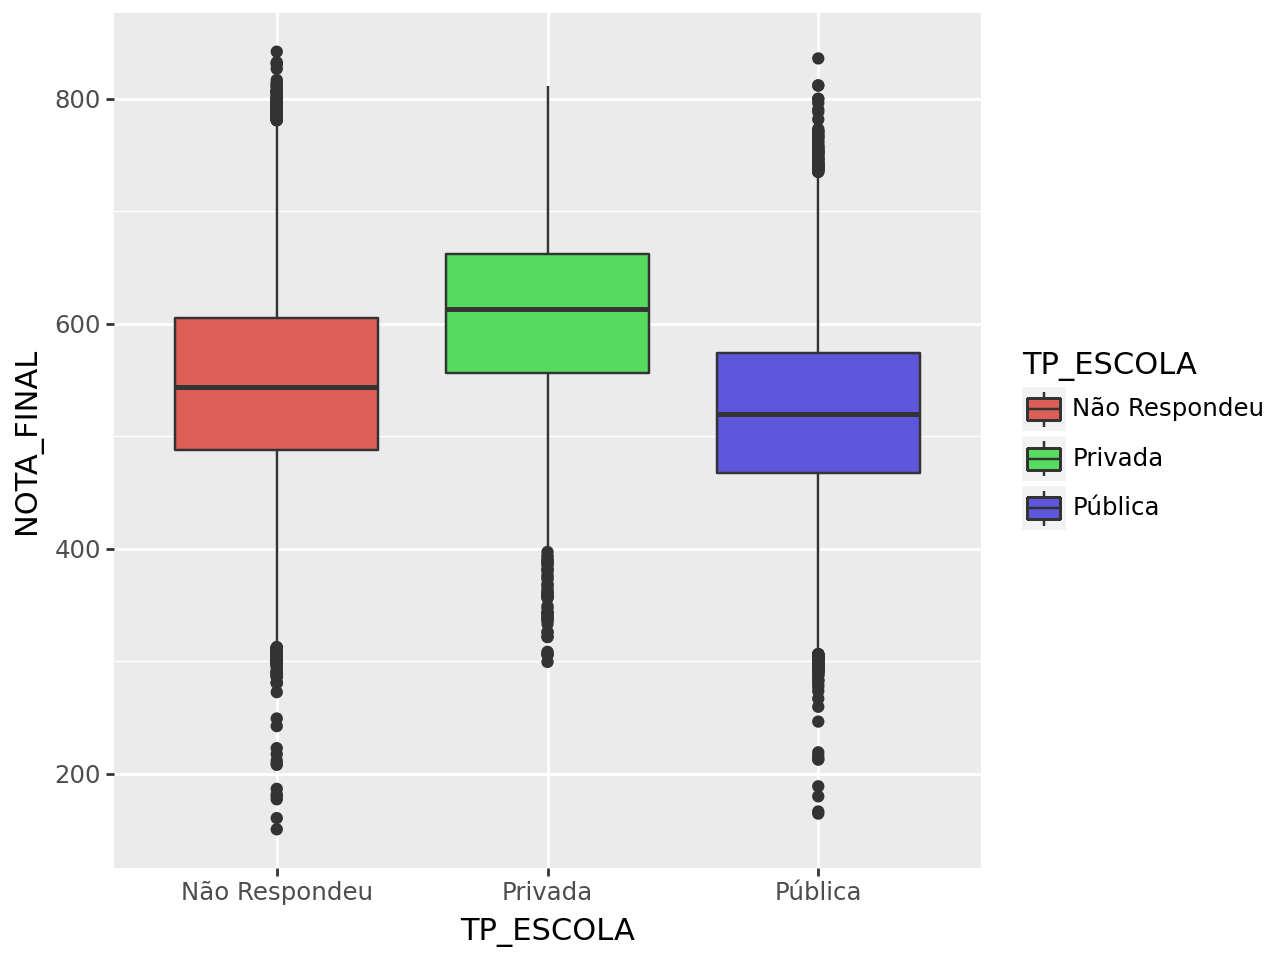

In [88]:
(ggplot(df_filtrado, aes(x='TP_ESCOLA', y='NOTA_FINAL',fill='TP_ESCOLA'))
  + geom_boxplot())

# Para saber mais

- [Polars](https://github.com/pola-rs/polars)
- [Microdados INEP - gov.br](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/saeb)
